# Task 3e Solution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
nJy_to_es = {'f435w': 0.005171303179169625, 'f606w': 0.011015393095414123, 'f775w': 0.005142804319487919, 'f850lp': 0.0024366884234595892, 'f105w': 0.008863392873279346, 'f125w': 0.008550667128846823, 'f140w': 0.010490592077764458, 'f160w': 0.006582638416409025}

In [3]:
filters = ['f435w','f606w', 'f775w','f850lp', 'f105w','f125w','f140w','f160w']

In [4]:
iso_cat = pickle.load(open('data/cat.p', 'rb'))  # read in signal catalogue
aper_cat = pickle.load(open('data/aper_cat.p', 'rb'))  # read in signal catalogue for aperture

In [5]:
iso_fluxes = {f: iso_cat[f'{f}_signal']/nJy_to_es[f] for f in filters} # convert to flux/nJy
aper_fluxes = {f: aper_cat[f'{f}_signal']/nJy_to_es[f] for f in filters} # convert to flux/nJy

In [6]:
iso_r1 = iso_fluxes['f105w']/iso_fluxes['f125w'] # break colour (mag) - usually on y-axis
iso_r2 = iso_fluxes['f850lp']/iso_fluxes['f105w'] # slope colour (mag) - usually on x-axis

In [7]:
aper_r1 = aper_fluxes['f105w']/aper_fluxes['f125w'] # break colour (mag) - usually on y-axis
aper_r2 = aper_fluxes['f850lp']/aper_fluxes['f105w'] # slope colour (mag) - usually on x-axis

--- plot all isophotal flux ratios for all objects

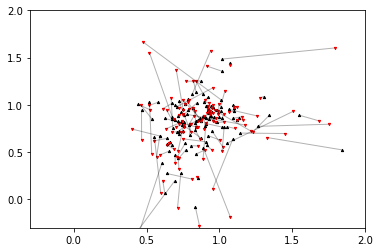

In [9]:
plt.scatter(iso_r1, iso_r2, s=5, c='k', marker = '^')
# --- plot all aperture flux ratios for all objects
plt.scatter(aper_r1, aper_r2, s=5, c='r', marker = 'v')

# Connect each pair
for ir1, ir2, ar1, ar2 in zip(iso_r1,iso_r2,aper_r1,aper_r2):
    plt.plot([ir1, ar1], [ir2, ar2], c='k', alpha=0.3, lw=1)
plt.xlim([-0.3,2])
plt.ylim([-0.3,2])
plt.show()